In [2]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sb
import yfinance as yf

In [3]:
df=pd.read_csv("../DataSets/2022_forbes_billionaires file.csv")

In [4]:
df

,Unnamed: 0,rank,name,networth,age,country,source,industry
0,0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...,...
2595,2595,2578,Jorge Gallardo Ballart,$1 B,80,Spain,pharmaceuticals,Healthcare
2596,2596,2578,Nari Genomal,$1 B,82,Philippines,apparel,Fashion & Retail
2597,2597,2578,Ramesh Genomal,$1 B,71,Philippines,apparel,Fashion & Retail
2598,2598,2578,Sunder Genomal,$1 B,68,Philippines,garments,Fashion & Retail


# Data Prepration:

### How can we handle missing values in the dataset?

In [5]:
df.isnull().sum()

Unnamed: 0    0
rank          0
name          0
networth      0
age           0
country       0
source        0
industry      0
dtype: int64

In [6]:
df.networth= df.networth.replace("[$B]","",regex=True).astype('float64')

In [7]:
df

,Unnamed: 0,rank,name,networth,age,country,source,industry
0,0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...,...
2595,2595,2578,Jorge Gallardo Ballart,1.0,80,Spain,pharmaceuticals,Healthcare
2596,2596,2578,Nari Genomal,1.0,82,Philippines,apparel,Fashion & Retail
2597,2597,2578,Ramesh Genomal,1.0,71,Philippines,apparel,Fashion & Retail
2598,2598,2578,Sunder Genomal,1.0,68,Philippines,garments,Fashion & Retail


#### Find the missing values by using the df.isnull()

# Exploratory Data Analysis (EDA):

### What are the key statistice for billionaire networth, and how is wealth distributed?

In [8]:
df.describe()

,Unnamed: 0,rank,networth,age
count,2600.000000,2600.000000,2600.000000,2600.000000
mean,1299.500000,1269.570769,4.860750,64.271923
std,750.699674,728.146364,10.659671,13.220607
min,0.000000,1.000000,1.000000,19.000000
25%,649.750000,637.000000,1.500000,55.000000
50%,1299.500000,1292.000000,2.400000,64.000000
75%,1949.250000,1929.000000,4.500000,74.000000
max,2599.000000,2578.000000,219.000000,100.000000


In [9]:
df.networth.median()

2.4

#### By using the describe() we get mean, median, min, max,std deviation  to find the key statistic for billionaires networth

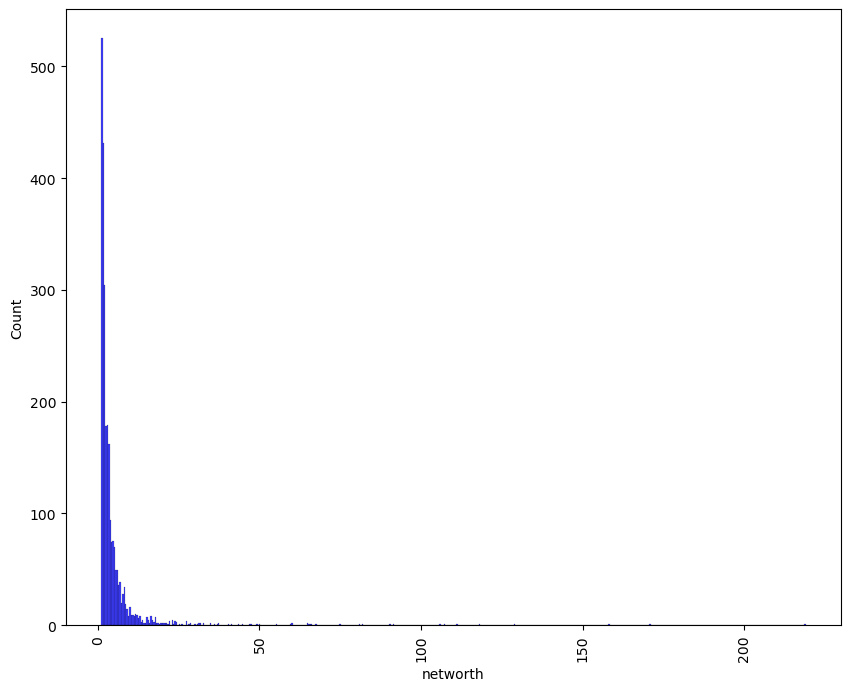

In [34]:
plt.figure(figsize=(10,8))
sb.histplot(x=df.networth,color='blue') 
plt.xticks(rotation=90)
plt.show()

#### By using the histogram we get the networth of billionaire

In [11]:
df.groupby('name')['networth'].sum().nlargest(10)

name
Elon Musk                    219.0
Jeff Bezos                   171.0
Bernard Arnault & family     158.0
Bill Gates                   129.0
Warren Buffett               118.0
Larry Page                   111.0
Sergey Brin                  107.0
Larry Ellison                106.0
Steve Ballmer                 91.4
Mukesh Ambani                 90.7
Name: networth, dtype: float64

#### By using the groupby we get the top 10 billionaires
#### 1. Elon Musk 210.0
#### 2. Jeff Bezos 171.0
#### 3. Bernard Arnualt & family 158.0

# Geographic Analysis:

### What is the global distribution  of billionaires accros different continents and region?

In [12]:
a=df.country.value_counts().nlargest(10)

In [13]:
a

country
United States    719
China            515
India            161
Germany          130
Russia            81
Hong Kong         67
Canada            64
Brazil            60
Italy             52
Taiwan            51
Name: count, dtype: int64

#### By using the value counts we get the  top 10 countries
#### United states 719
#### China         515
#### India         161

### Which country have the highest billionaire wealth concenration?

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_16140\3000350831.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=df.country,y=df.networth, palette='winter')


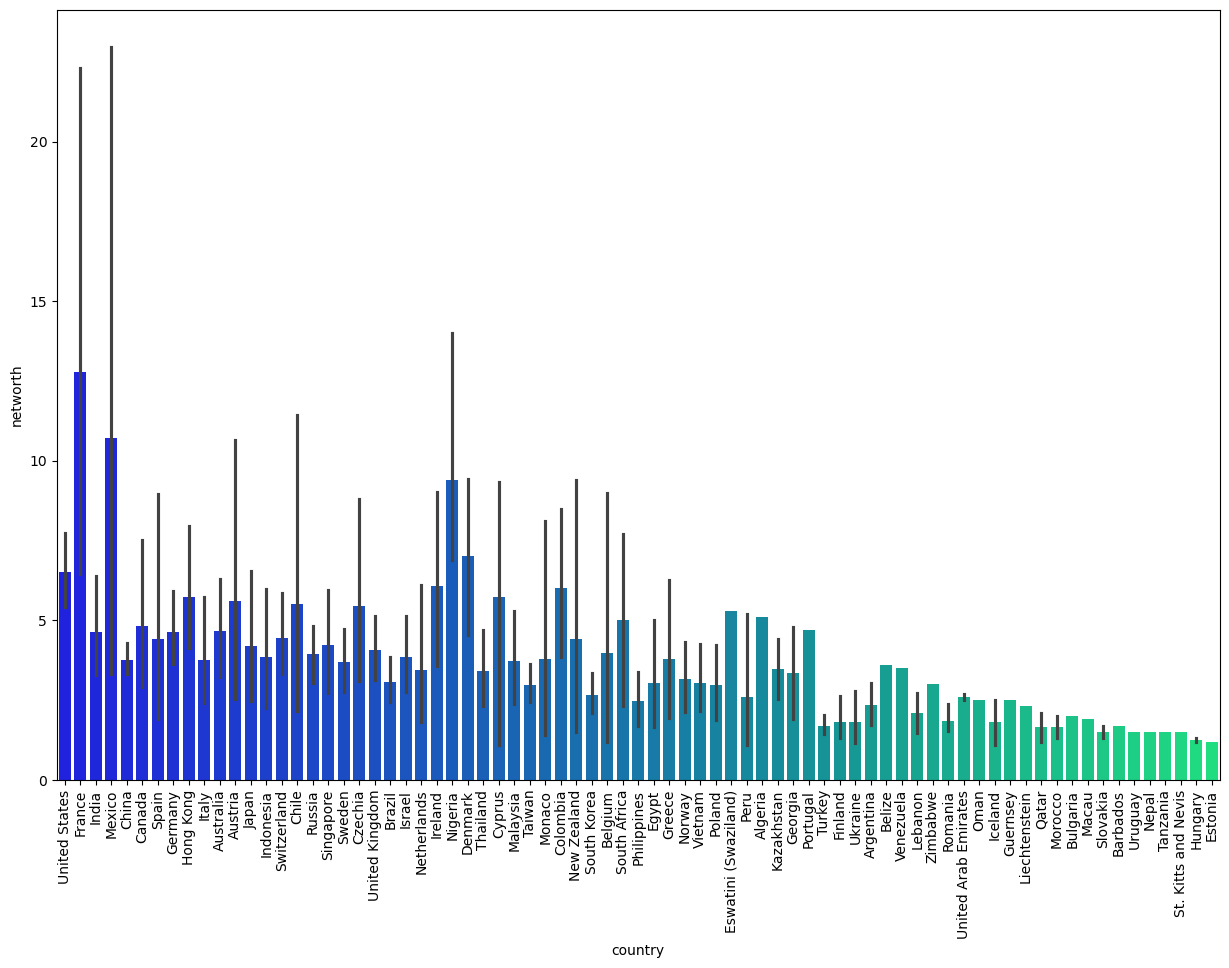

In [33]:
plt.figure(figsize=(15,10))
sb.barplot(x=df.country,y=df.networth, palette='winter')
plt.xticks(rotation=90)
plt.show()

#### By using the barplot we get the countries with their networth
#### highest countries with their networth
#### France,India & Nigeria

In [15]:
a=df.name.value_counts().nlargest(10)

In [16]:
a

name
Wang Yanqing & family     2
Li Li                     2
Elon Musk                 1
Sanjit Biswas             1
Farkhad Akhmedov          1
Marc Andreessen           1
John Bicket               1
Zadik Bino & family       1
Alex Birkenstock          1
Christian Birkenstock     1
Name: count, dtype: int64

#### By using the value counts we get the top 10 billionaires

# Industry Analysis:

### Which industries produce the highest number  of billionaires? 

In [17]:
df.groupby('industry')['networth'].sum().nlargest(10)

industry
Technology                2168.40
Finance & Investments     1734.30
Fashion & Retail          1613.20
Manufacturing             1079.80
Diversified                939.50
Food & Beverage            933.35
Healthcare                 708.90
Real Estate                685.80
Automotive                 582.60
Media & Entertainment      493.60
Name: networth, dtype: float64

#### We get the top 10 largest country From  the industry techhnology 2168.40 has highest networth 

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_16140\3649067835.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=df.industry,y=df.networth,palette='winter')


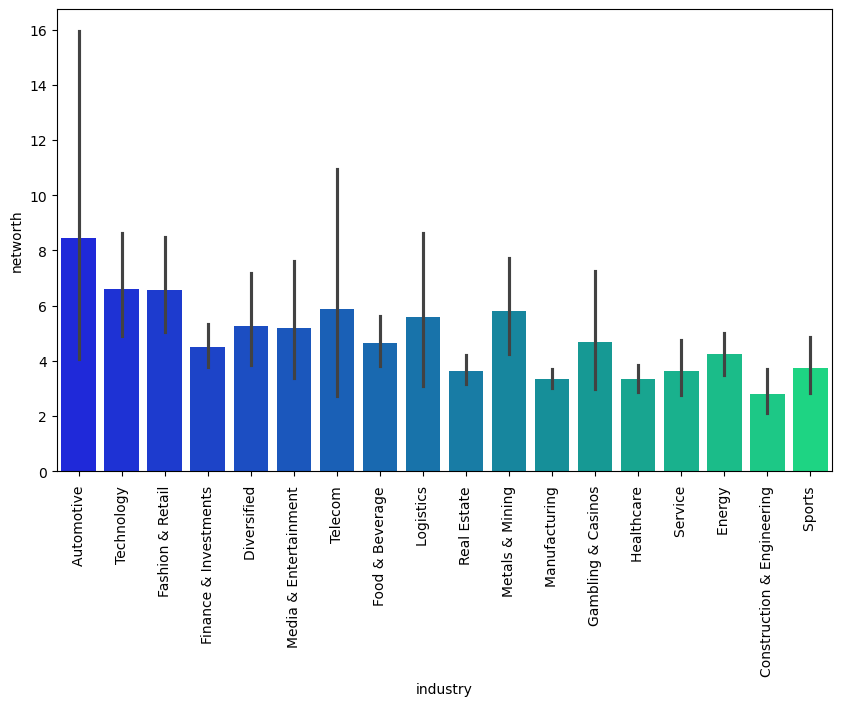

In [35]:
plt.figure(figsize=(10,6))
sb.barplot(x=df.industry,y=df.networth,palette='winter')
plt.xticks(rotation=90)
plt.show()

#### By using the barplot we get the industries with their networth

# Age-Based Analysis:

### What is the average and median age of billionaires?

In [19]:
df.age.mean()

64.27192307692307

In [20]:
df.age.median()

64.0

In [21]:
df.age.max()

100

In [22]:
df.age.min()

19

#### By using the average and median we get billionaires age

In [23]:
df.groupby('name')['age'].sum().nlargest(1)

name
Wang Yanqing & family     130
Name: age, dtype: int64

In [24]:
df.groupby('name')['networth'].mean().nsmallest(1)

name
Carl DeSantis     1.0
Name: networth, dtype: float64

### Who are the youngest and oldest billinaires in the dataset?

In [25]:
df.age.nlargest(1)

1681    100
Name: age, dtype: int64

In [26]:
df.loc[1681]

Unnamed: 0                      1681
rank                            1645
name                  George Joseph 
networth                         1.8
age                              100
country                United States
source                     insurance
industry      Finance & Investments 
Name: 1681, dtype: object

#### By using the loc we get the oldest billionaires name with their age 
#### Name: George Joseph
#### Age : 100

In [27]:
df.age.nsmallest(1)

1311    19
Name: age, dtype: int64

In [28]:
df.loc[1311]

Unnamed: 0                    1311
rank                          1292
name          Kevin David Lehmann 
networth                       2.4
age                             19
country                    Germany
source                  drugstores
industry         Fashion & Retail 
Name: 1311, dtype: object

#### By using the loc we get the youngest billionaires name with their age 
#### Name: Kevin David Lehmann
#### Age : 19